In [1]:
using DifferentialEquations
using Plots
using DataFrames

In [2]:
function seir_ode(dY,Y,p,t)
    β, σ, γ, μ = p[1], p[2], p[3], p[4]
    S, E, I = Y[1], Y[2], Y[3]
    dY[1] = μ*(1-S)-β*S*I
    dY[2] = β*S*I-(σ+μ)*E
    dY[3] = σ*E - (γ+μ)*I
end

seir_ode (generic function with 1 method)

In [3]:
function seir(β, σ, γ, μ, tspan=(0.0,100.0); S₀=0.99, E₀=0, I₀=0.01, R₀=0)
    par=[β, σ, γ, μ]
    init=[S₀, E₀, I₀]
    seir_prob = ODEProblem(seir_ode,init,tspan,par)
    sol=solve(seir_prob);
    R=ones(1,size(sol)[2])-sum(sol,dims=1);
    return hcat(sol.t, sol[1,:], sol[2,:], sol[3,:], R')
    
end

seir (generic function with 2 methods)

In [4]:
r0(β, σ, γ, μ) = (σ/(σ+μ))*(β/(γ+μ))

r0 (generic function with 1 method)

# Case 1:  $\beta$  = 0.8 (n=20, p=0.04) 
   
   * n = 20 Average number of people a person runs into per day 
   * p = 0.04 the probability of transfering the Covid-19 virus 4% = 0.04 
   
   
  Here we are looking at the probability of transferring the virus,  p = 4% 


In [5]:
p = 0.04 
n = 20.0;
β = p*n;
σ = 0.25;
γ = 0.143;
μ = 0.01199/(365);

In [6]:
r0_20_4percent = r0(β, σ, γ, μ)

5.592385943736419

In [7]:
result_20_4percent = seir(β, σ, γ, μ);

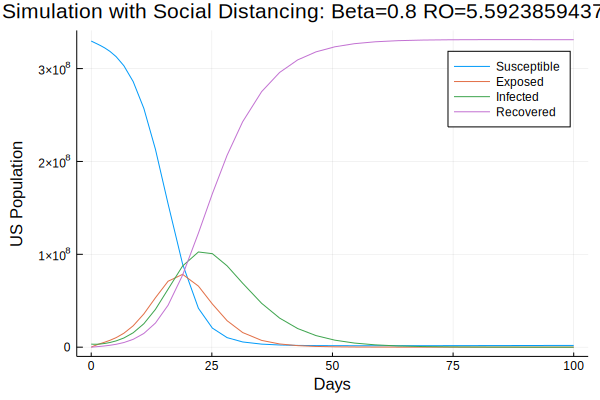

In [8]:
days = result_20_4percent[:,1]
y = [3.33e8*result_20_4percent[:,2], 3.33e8*result_20_4percent[:,3], 
     3.33e8*result_20_4percent[:,4], 3.33e8*result_20_4percent[:,5]]

lineTypes = [:Susceptible :Exposed :Infected :Recovered]
number = 4

plot(days, y,
     title = "Simulation with Social Distancing: Beta=$β RO=$r0_20_4percent",
     xlabel = "Days",
     ylabel = "US Population",
    label = (lineTypes)
)

----

# Case 2:  $\beta$  = 0.4 (n=20, p=0.02) 
   
* n = 20 Average number of people a person runs into per day 
* p = 0.02 the probability of transfering the Covid-19 virus 4% = 0.02 
   

Here we are looking at the probability of transferring the virus,  p = 2% 


In [9]:
p = 0.02;
n = 20.0;
β = p*n;
σ = 0.25;
γ = 0.143;
μ = 0.01199/(365);

In [10]:
r0_20_2percent = r0(β, σ, γ, μ)

2.7961929718682095

In [11]:
result_20_2percent = seir(β, σ, γ, μ);

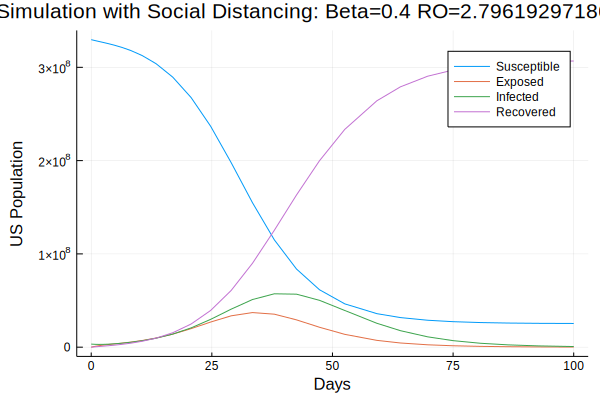

In [13]:
days = result_20_2percent[:,1]
y = [3.33e8*result_20_2percent[:,2], 3.33e8*result_20_2percent[:,3], 
     3.33e8*result_20_2percent[:,4], 3.33e8*result_20_2percent[:,5]]

lineTypes = [:Susceptible :Exposed :Infected :Recovered]
number = 4

plot(days, y,
     title = "Simulation with Social Distancing: Beta=$β RO=$r0_20_2percent",
     xlabel = "Days",
     ylabel = "US Population",
    label = (lineTypes)
)

--------------

# Case 3:  Varying $\beta$ by adjusting the number of Contacts, n= [7, 10, 20] with p= 0.4
   
* n= [7, 10, 20] Average number of people a person runs into per day 
* p = 0.04 the probability of transfering the Covid-19 virus 4% = 0.04 
   

Here we are looking at the probability of transferring the virus,  p = 4% is 



In [14]:
p = 0.04;
contacts = [7.0, 10.0, 20.0];
β1 = p*contacts[1];
β2 = p*contacts[2];
β3 = p*contacts[3];
σ = 0.25;
γ = 0.143;
μ = 0.01199/(365);

In [15]:
r0_7_4percent = r0(β1, σ, γ, μ);
r0_10_4percent = r0(β2, σ, γ, μ);
r0_20_4percent = r0(β3, σ, γ, μ);

In [16]:
result_7_4percent = seir(β1, σ, γ, μ);
result_10_4percent = seir(β2, σ, γ, μ);
result_20_4percent = seir(β3, σ, γ, μ);

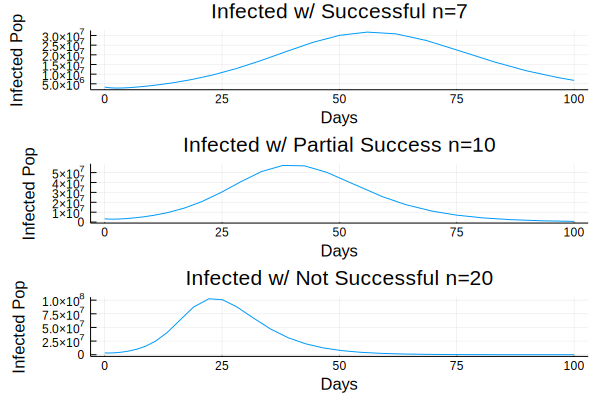

In [17]:
days7 = result_7_4percent[:,1]
days10 = result_10_4percent[:,1]
days20 = result_20_4percent[:,1]

y7 = 3.33e8*result_7_4percent[:,4]
y10 = 3.33e8*result_10_4percent[:,4]
y20 = 3.33e8*result_20_4percent[:,4]


#lineTypes = [:Successful_7 :PartialSuccess_10 :Unsuccessful_20]
lineTypes7 = [:Successful_7]
lineTypes10 = [:Successful_10]
lineTypes20 = [:Successful_20]

p1 = plot(days7, y7,
     title = "Infected w/ Successful n=7",
     xlabel = "Days",
     ylabel = "Infected Pop",
    label = (lineTypes7)
)

p2 = plot(days10, y10,
     title = "Infected w/ Partial Success n=10",
     xlabel = "Days",
     ylabel = "Infected Pop",
    label = (lineTypes10)
)

p3 = plot(days20, y20,
     title = "Infected w/ Not Successful n=20",
     xlabel = "Days",
     ylabel = "Infected Pop",
    label = (lineTypes20)
)

plot(p1, p2, p3, layout = (3, 1), legend = false)
#plot(p1, p2, p3, legend = false)

In [18]:
peakInfected = [ 3.33e8 * findmax(result_7_4percent[:,4])[1], 
                 3.33e8 * findmax(result_10_4percent[:,4])[1],
                 3.33e8 * findmax(result_20_4percent[:,4])[1]]

peakDay = [ floor(result_7_4percent[findmax((result_7_4percent[:,4]))[2],1]),
            floor(result_10_4percent[findmax((result_10_4percent[:,4]))[2],1]),
            floor(result_20_4percent[findmax((result_20_4percent[:,4]))[2],1]),

]

contact_df = DataFrame(beta = [β1, β2, β3],
                       contacts = contacts,
                       peakDay = peakDay,
                       peakInfected = peakInfected,
                       description = ["Successful", "Partially Successful", "Unsuccessful"]
                     
)

,beta,contacts,peakDay,peakInfected,description
,Float64,Float64,Float64,Float64,String
1,0.28,7.0,55.0,3.17544e7,Successful
2,0.4,10.0,37.0,5.72287e7,Partially Successful
3,0.8,20.0,22.0,1.02528e8,Unsuccessful


# Case 5:  Varying number of Contacts Per Day, n= 1:20 with p= 0.4
   
* n= 1:20 Average number of people a person runs into per day 
* p = 0.04 the probability of transfering the Covid-19 virus 4% = 0.04
   

Here we are looking at the probability of transferring the virus,  p = 4% is 




In [19]:
p = 0.04;
contacts = collect(1.0:20.0)
σ = 0.25;
γ = 0.143;
μ = 0.01199/(365);

In [20]:
BetaArray = Float64[];
r0Array = Float64[];
maxInfect = Float64[];

for i in contacts
    βi = p*i;
    push!(BetaArray,βi)
    
    push!(r0Array, r0(βi, σ, γ, μ))
    
    r = seir(βi, σ, γ, μ)
    push!(maxInfect, 3.33e8 * findmax(r[:,4])[1])
    
end

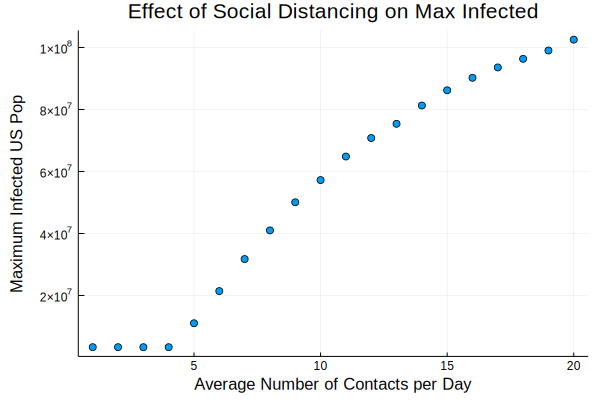

In [21]:
#Effect of Social Distancing on Max Infected
scatter(contacts, maxInfect,
     title = "Effect of Social Distancing on Max Infected",
     xlabel = "Average Number of Contacts per Day",
     ylabel = "Maximum Infected US Pop",
     legend = false
)

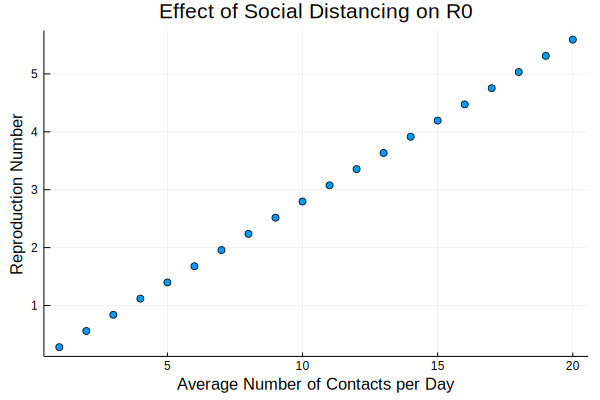

In [22]:
#Effect of Social Distancing on Ro
scatter(contacts, r0Array,
     title = "Effect of Social Distancing on R0",
     xlabel = "Average Number of Contacts per Day",
     ylabel = "Reproduction Number",
     legend = false
)